Importaciones

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

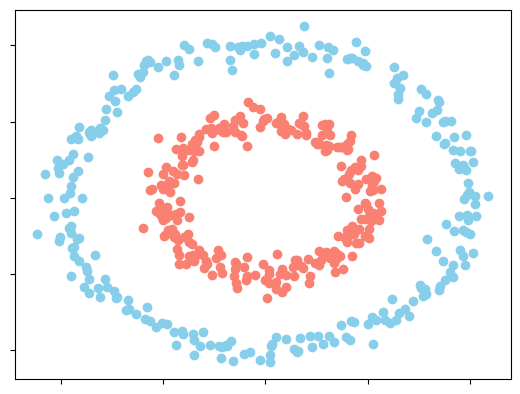

In [2]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar dos anillos concéntricos de datos
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

#Resolución del mapa de predicción
res = 100

# Coordenadas del mapa de predicción
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacío a 0.5 del mapa de predicción
_pY = np.zeros((res, res)) + 0.5

#Visualización de la nube de datos
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

Ejemplo con Tensorflow

Step 0 / 1000 - Loss =  0.47399065 - Acc =  0.5
Step 25 / 1000 - Loss =  0.4234362 - Acc =  0.5
Step 50 / 1000 - Loss =  0.3715481 - Acc =  0.564
Step 75 / 1000 - Loss =  0.28721502 - Acc =  0.68
Step 100 / 1000 - Loss =  0.113219425 - Acc =  0.948
Step 125 / 1000 - Loss =  0.09423459 - Acc =  0.98
Step 150 / 1000 - Loss =  0.081551455 - Acc =  0.986
Step 175 / 1000 - Loss =  0.071109846 - Acc =  0.99
Step 200 / 1000 - Loss =  0.062230058 - Acc =  0.996
Step 225 / 1000 - Loss =  0.054847613 - Acc =  1.0
Step 250 / 1000 - Loss =  0.048492935 - Acc =  1.0
Step 275 / 1000 - Loss =  0.043048877 - Acc =  1.0
Step 300 / 1000 - Loss =  0.038465306 - Acc =  1.0
Step 325 / 1000 - Loss =  0.03458601 - Acc =  1.0
Step 350 / 1000 - Loss =  0.031273272 - Acc =  1.0
Step 375 / 1000 - Loss =  0.028410887 - Acc =  1.0
Step 400 / 1000 - Loss =  0.025926618 - Acc =  1.0
Step 425 / 1000 - Loss =  0.023770945 - Acc =  1.0
Step 450 / 1000 - Loss =  0.021888826 - Acc =  1.0
Step 475 / 1000 - Loss =  0.02024

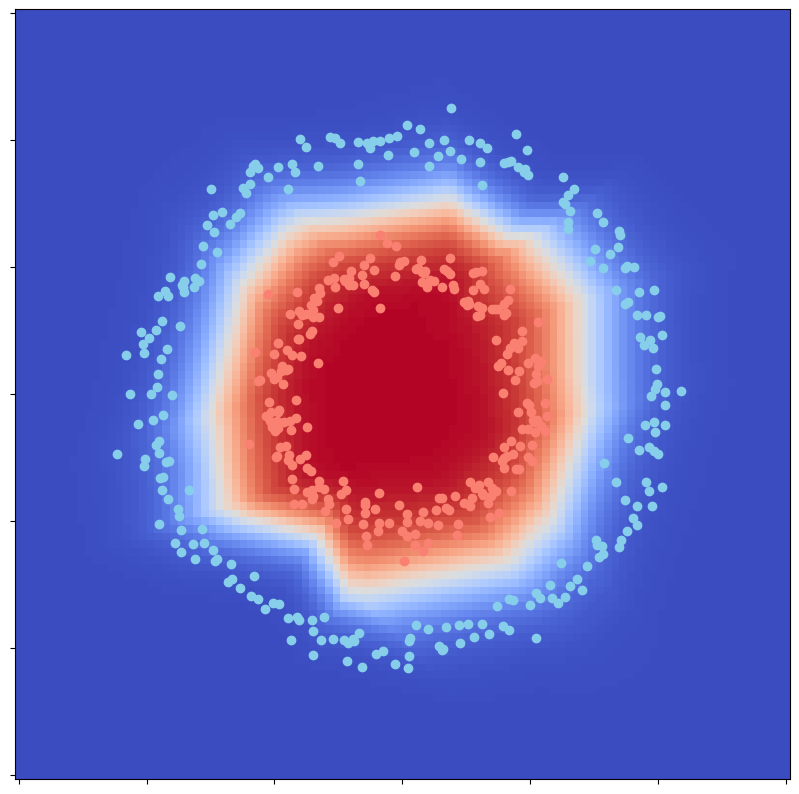

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           #Learning rate
nn = [2, 16, 8, 1]  # Número de neuronas por capa

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='weights_3')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='weights_2')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# Evaluación de las predicciones
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Número de ciclos de entrenamiento
iPY = [] # Aquí guardaremos la evolución de la predicción, para la animación

with tf.Session() as sess:
  # Inicializamos todos los parámetros de la red, las matrices w y b
  sess.run(tf.global_variables_initializer())
  # Iteramos n pases de entrenamiento
  for step in range(n_steps):
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY
    # La evaluación del optimizer producirá el entrenamiento de la red
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y})
    # Cada 25 iteraciones, imprimimos métricas
    if step % 25 == 0:
      # Cálculo del accuracy
      acc = np.mean(np.round(_pY) == Y)
      # Impresión de métricas
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc = ', acc)
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))
      # Y lo guardamos para visualizar la animación
      iPY.append(_pY)

# ------- CÓDIGO ANIMACIÓN ------- #
ims = []
fig = plt.figure(figsize=(10, 10))
print("--- Generando animación ---")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  # Visualización de la nube de datos
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
  # plt.tittle("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())



Ejemplo con Keras

In [40]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


learning_rate = 0.01           # learning rate
nn = [2, 16, 8, 1]  # Número de neuronas por capa

# Creamos el objeto que contendrá a nuestra red neuronal, como secuencia de capas
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))


# Compilamos el modelo, definiendo la función de coste y el optimizador
model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks
model.fit(X, Y, epochs=100)



NotImplementedError: numpy() is only available when eager execution is enabled.

Ejemplo con ScikitLearn

In [41]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # Número de neuronas por capa


# Creamos el objeto del modelo de red neuronal multicapa
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)

# Y lo entrenamos con nuestros datos
clf.fit(X, Y)

Iteration 1, loss = 0.40575540
Iteration 2, loss = 0.19818850
Iteration 3, loss = 0.12721885
Iteration 4, loss = 0.13406336
Iteration 5, loss = 0.12879896
Iteration 6, loss = 0.12448084
Iteration 7, loss = 0.12471415
Iteration 8, loss = 0.12492144
Iteration 9, loss = 0.12449562
Iteration 10, loss = 0.12419204
Iteration 11, loss = 0.12422848
Iteration 12, loss = 0.12386601
Iteration 13, loss = 0.12379518
Iteration 14, loss = 0.12366256
Iteration 15, loss = 0.12355985
Iteration 16, loss = 0.12340755
Iteration 17, loss = 0.12317738
Iteration 18, loss = 0.12303449
Iteration 19, loss = 0.12317864
Iteration 20, loss = 0.12267915
Iteration 21, loss = 0.12254395
Iteration 22, loss = 0.12242264
Iteration 23, loss = 0.12232904
Iteration 24, loss = 0.12199896
Iteration 25, loss = 0.12181679
Iteration 26, loss = 0.12165021
Iteration 27, loss = 0.12146225
Iteration 28, loss = 0.12123156
Iteration 29, loss = 0.12094870
Iteration 30, loss = 0.12081414
Iteration 31, loss = 0.12050574
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)